<a href="https://colab.research.google.com/github/Aleena24/reinforcement-learning/blob/main/K_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ad_slots = ['Top Banner', 'Sidebar', 'Footer', 'Pop-up']
num_arms = len(ad_slots)

In [60]:
true_ctrs = np.array([0.03, 0.02, 0.04, 0.03])

# Epsilon-Greedy Bandit

Epsilon-Greedy Algorithm:
With probability epsilon, a random ad slot is chosen (exploration).
With probability 1 - epsilon, the ad slot with the highest estimated CTR is chosen (exploitation).

In [61]:
class EpsilonGreedyBandit:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)

    def select_action(self):

        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.q_values)

    def update(self, action, reward):

        self.counts[action] += 1
        alpha = 1 / self.counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])


num_trials = 1000
epsilon = 0.1


bandit = EpsilonGreedyBandit(num_arms=num_arms, epsilon=epsilon)
rewards = []


for i in range(num_trials):
    action = bandit.select_action()
    reward = np.random.binomial(1, true_ctrs[action])
    bandit.update(action, reward)
    rewards.append(reward)

for i in range(num_arms):
    print(f"Estimated CTR for {ad_slots[i]}: {bandit.q_values[i]:.2f}")


Estimated CTR for Top Banner: 0.02
Estimated CTR for Sidebar: 0.00
Estimated CTR for Footer: 0.05
Estimated CTR for Pop-up: 0.02


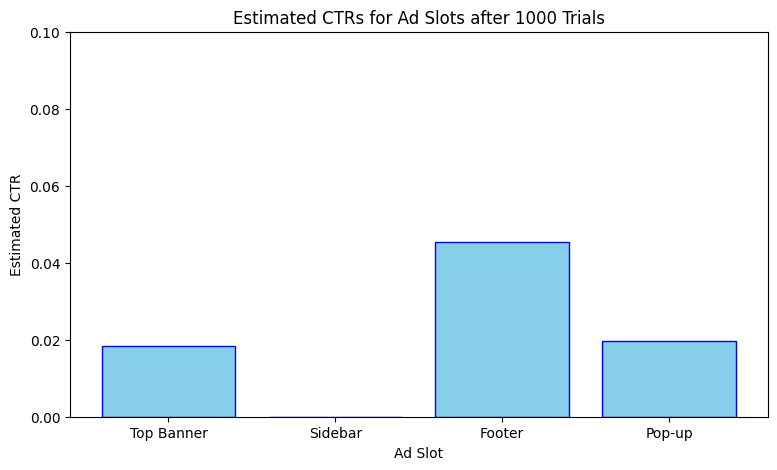

In [62]:
plt.figure(figsize=[9, 5])
plt.bar(range(num_arms), bandit.q_values, color='skyblue', edgecolor='blue')
plt.xlabel('Ad Slot')
plt.ylabel('Estimated CTR')
plt.xticks(range(num_arms), ad_slots)
plt.ylim(0, 0.1)
plt.title('Estimated CTRs for Ad Slots after 1000 Trials')
plt.show()

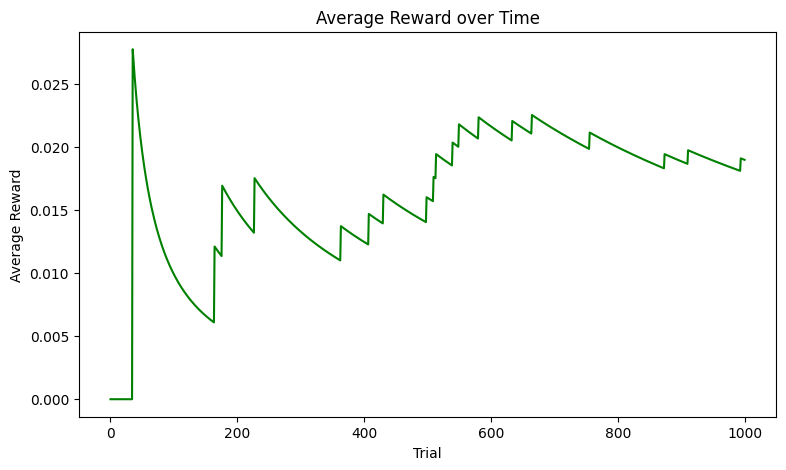

In [63]:
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / np.arange(1, num_trials + 1)
plt.figure(figsize=[9, 5])
plt.plot(average_rewards, color='green')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.show()